<a href="https://colab.research.google.com/github/shab29/Regression_capstoneProject/blob/main/Rossmann_Sales_Prediction_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rossmann Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Arun Prasath
##### **Team Member 2 -**Shabnam Bano
##### **Team Member 3 -** Naga Sai


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Nagasai122/salesprediction

# **Problem Statement**


##Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

## You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


# ***Let's Begin !***

## ***1. Exploring the Datasets***

### Import Libraries

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np

# Importing for visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Datatime 
from datetime import datetime

# Importing warnings to import
import warnings 
warnings.filterwarnings("ignore")


#Importing onehotencoder
from sklearn.preprocessing import OneHotEncoder

# Scaling of the Splitted Data.
from sklearn.preprocessing import StandardScaler


#Importing libraries 

from sklearn.tree import DecisionTreeRegressor

# Importing Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Importing Linear Regression 
from sklearn.linear_model import LinearRegression

#metrics import

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

### Dataset Loading

In [ ]:
# Load Dataset
sales_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_project/Regression_sale prediction/Data/Copy of Rossmann Stores Data.csv")
store_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_project/Regression_sale prediction/Data/Copy of store.csv")

### Dataset First View

In [ ]:
# Dataset First Look
sales_df.head()

In [ ]:
store_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
sales_df.shape

In [ ]:
store_df.shape

### Dataset Information

In [ ]:
# Dataset Info
sales_df.info()

In [ ]:
store_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates_sales_df= sales_df[sales_df.duplicated()]
duplicates_sales_df

In [ ]:
duplicates_store_df= store_df[store_df.duplicated()]
duplicates_store_df

Observation:
 No duplicates found in the two data sets provided

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
sales_df.info()

Observation:

*   In the sales dataset, we are fortunate enough to get the dataset with 0 null values in the features
*   We provided with '1017209' rows and '9' features

In [ ]:
store_df.info()

Observation:

*   In store dataset we provided with 1115 rows and 10 features
*   few features come up with null values, which we are going to treat.


#### Visualizing the Missing Values/Null Values

In [ ]:
# finding feature wise percentage missing values
missing_values_percentage = round((store_df.isna().sum().sort_values(ascending=False)/len(store_df))*100,2)
missing_values_percentage

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
plt.title("Percentage missing values per column",fontsize=15)

a=sns.barplot(x=missing_values_percentage[missing_values_percentage>0],y=missing_values_percentage[missing_values_percentage>0].index)
a.set_ylabel('Column Name')
a.set_xlabel('Percentage Missing Values')
plt.show()

Observations:

* The Percentage of Null values in each feature in the sales dataset has been shown above.
* Feature CompetitionDistance with less than 1% null values
* It shows that features such as CompetitionOpenSinceMonth, CompetitionOpenSinceYear consists of around 30% null values.
* Promo2SinceYear, Promo2SinceWeek, PromoInterval are the features with the 50% of null values in respective entities.


Hence, we should deal with the null values by various methods before proceeding further.

### Dealing with Null values

In [ ]:
# Distribution plot for the competition distance

plt.subplots(figsize=(10, 6))
sns.distplot(x=store_df['CompetitionDistance'])
plt.xlabel("Stores")
plt.ylabel("Competition Distance")

Observations:

* As we already known that "CompetitionDistance" is the distance in meters to the nearest competitors.
* Hence distance of each store from the competitor will be seen using **"Distribution Plot"**

In a skewed distribution, the median is often a preferred measure of central tendency, as the mean is not usually in the middle of the distribution

In [ ]:
# Filling the null values in "competition distance" feature with "Median"

a_type_median = round(store_df.loc[(store_df["StoreType"]=='a'),'CompetitionDistance'].median(),1)
b_type_median = round(store_df.loc[(store_df["StoreType"]=='b'),'CompetitionDistance'].median(),1)
c_type_median = round(store_df.loc[(store_df["StoreType"]=='c'),'CompetitionDistance'].median(),1)
d_type_median = round(store_df.loc[(store_df["StoreType"]=='d'),'CompetitionDistance'].median(),1)

print("The median Compeition Distance for stores of type a is " + str(a_type_median))
print("The median Compeition Distance for stores of type b is " + str(b_type_median))
print("The median Compeition Distance for stores of type c is " + str(c_type_median))
print("The median Compeition Distance for stores of type d is " + str(d_type_median))

store_df.loc[store_df["StoreType"]=='a']= store_df.loc[store_df["StoreType"]=='a'].fillna(value={'CompetitionDistance': a_type_median})
store_df.loc[store_df["StoreType"]=='b']= store_df.loc[store_df['StoreType']=='b'].fillna(value={"CompetitionDistance": b_type_median})
store_df.loc[store_df["StoreType"]=='c']= store_df.loc[store_df['StoreType']=='c'].fillna(value={"CompetitionDistance": c_type_median})
store_df.loc[store_df["StoreType"]=='d']= store_df.loc[store_df['StoreType']=='d'].fillna(value={"CompetitionDistance": d_type_median})

In [ ]:
store_df.info()

In [ ]:
#Distribution Plot for "Competition open since month"

plt.subplots(figsize=(10, 6))
sns.distplot(x = store_df["CompetitionOpenSinceMonth"].value_counts())

In [ ]:
#Let's check mean value for CompetitionOpenSinceMonth according to each store type
store_df.groupby(['StoreType'])['CompetitionOpenSinceMonth'].mean()

In [ ]:
store_df["CompetitionOpenSinceYear"].value_counts()

In [ ]:
store_df.groupby(['StoreType'])['CompetitionOpenSinceMonth'].median()

In [ ]:
#Distribution Plot for "Competition open since year"

plt.subplots(figsize=(10, 6))
sns.distplot(x = store_df["CompetitionOpenSinceYear"].value_counts())

* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Also we simply say, competition for the stores in general are peak for few and low for very few stores.
* Hence we dealing with the median values for treating the null.

In [ ]:
# Filling the null values in the feature "Competiton open since month/year" with "median" values.

#Finding the median month for each store type
medianMonth_a=round(store_df.loc[(store_df['StoreType'] == 'a'), 'CompetitionOpenSinceMonth'].median(), 1)
medianMonth_b=round(store_df.loc[(store_df['StoreType'] == 'b'), 'CompetitionOpenSinceMonth'].median(), 1)
medianMonth_c=round(store_df.loc[(store_df['StoreType'] == 'c'), 'CompetitionOpenSinceMonth'].median(), 1)
medianMonth_d=round(store_df.loc[(store_df['StoreType'] == 'd'), 'CompetitionOpenSinceMonth'].median(), 1)

#filling the null values of CompetitionOpenSinceMonth according to store type
store_df.loc[store_df['StoreType']=='a']=store_df.loc[store_df['StoreType']=='a'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_a})
store_df.loc[store_df['StoreType']=='b']=store_df.loc[store_df['StoreType']=='b'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_b})
store_df.loc[store_df['StoreType']=='c']=store_df.loc[store_df['StoreType']=='c'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_c})
store_df.loc[store_df['StoreType']=='d']=store_df.loc[store_df['StoreType']=='d'].fillna(value={'CompetitionOpenSinceMonth':medianMonth_d})


#Finding the median Year for each store type
medianYear_a=round(store_df.loc[(store_df['StoreType'] == 'a'), 'CompetitionOpenSinceYear'].median(), 1)
medianYear_b=round(store_df.loc[(store_df['StoreType'] == 'b'), 'CompetitionOpenSinceYear'].median(), 1)
medianYear_c=round(store_df.loc[(store_df['StoreType'] == 'c'), 'CompetitionOpenSinceYear'].median(), 1)
medianYear_d=round(store_df.loc[(store_df['StoreType'] == 'd'), 'CompetitionOpenSinceYear'].median(), 1)

#filling the null values of CompetitionOpenSinceYear according to store type
store_df.loc[store_df['StoreType']=='a']=store_df.loc[store_df['StoreType']=='a'].fillna(value={'CompetitionOpenSinceYear':medianYear_a})
store_df.loc[store_df['StoreType']=='b']=store_df.loc[store_df['StoreType']=='b'].fillna(value={'CompetitionOpenSinceYear':medianYear_b})
store_df.loc[store_df['StoreType']=='c']=store_df.loc[store_df['StoreType']=='c'].fillna(value={'CompetitionOpenSinceYear':medianYear_c})
store_df.loc[store_df['StoreType']=='d']=store_df.loc[store_df['StoreType']=='d'].fillna(value={'CompetitionOpenSinceYear':medianYear_d})


In [ ]:
store_df.info()

* For other three features, we just replacing the null values by "0"
* Assuming the if the Promotion since detail not given, then we considering there is no promotions in the store.

In [ ]:
# Filling the null values in "Promotion" related features with "0" & "NA"

store_df["Promo2SinceWeek"].fillna(value = 0 , inplace = True)
store_df["Promo2SinceYear"].fillna(value = 0 , inplace = True)
store_df["PromoInterval"].fillna(value = 'NA' , inplace = True)

In [ ]:
# Checking the percentage of null values in the store dataframe

(round(store_df.isnull().sum()/(store_df.shape[0]),4)*100)


* Hence, Both the dataset has been cleaned without null values in the entities of the features
* we shall now proceed for the merging of the two dataset

In [ ]:
# Merging of Two Source Dataset

df = sales_df.merge(right = store_df, on= "Store", how = "left")  

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.info()

## ***2. Understanding the Dataset Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables of features Description :


* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Checking Unique Values for each feature :

In [ ]:
# Check Unique Values for each variable.
# Sorting out the categorical features from the dataset

categorical_features = []
for i in df.columns:
  a = df[i].value_counts()
  if len(a) < 600:
    categorical_features.append(i)
print(categorical_features)

for col in categorical_features:
  values = df[col].unique()
  print(f"The Unique categorical values of the feature {col} is {values}")
  print("\n")

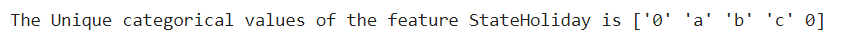

* It is noted that "0" provided as the string datatype
* It's nessasary to change it into integer datatype.

## 3. ***Data Wrangling***

In [ ]:
#Before changing
df["StateHoliday"].unique()

In [ ]:
# After Replacing the "0" with integer 0
df["StateHoliday"].replace({"0":0}, inplace = True)
df["StateHoliday"].unique()

In [ ]:
# converting float data type in to Interger data type.

df['CompetitionDistance'] = df['CompetitionDistance'].astype(int)
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype(int)
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype(int)
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].astype(int)
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype(int)
df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d",errors='raise')

In [ ]:
df.info()

In [ ]:
df["Date"]

In [ ]:
# Created copy of treated data set
df_dummy = df.copy()

In [ ]:
#Converting the "Date" column from string to datatime
df["Date"] = df["Date"].astype(np.datetime64)
# Creating the separate columns for "DayofYear" "WeekofYear" "Month" "Year"
df["Year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["dayofyear"] = df["Date"].dt.dayofyear
df["weekofyear"] = df["Date"].dt.weekofyear

In [ ]:
df["Year"].value_counts()

In [ ]:
#It is noted that data provided for only three years
# Promotion since year has 0 as data value
# we know our dataset is provided only for 3 years till 2015
# hence we replacing the value 0 as 2015 in order to get the correct value when equating the years.

df["Promo2SinceYear"].replace({0:2015}, inplace = True)

In [ ]:
df["Promo2SinceYear"].unique()

In [ ]:
df.head().T

In [ ]:
df.info()

### Data Manipulations done and insights found :

Data manipulation is the process of changing or altering data in order to make it more readable, organized and to get insights.

1. Converting string value data type in to Integers
2. Converting Date column in to Datetime format and there after splitting the date column in to year, month,day &  week of the year columns
3. Replacing Promosinceyear to 2015 for those stores which were opened in the year 2015 instead of zero.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### *Percentage of sales against each categorical features*


In [ ]:
# Percentage of sales against each categorical features
for i in categorical_features:
  a = round(df["Sales"].groupby(df[i]).sum()/df["Sales"].sum() * 100, 2)
  b = pd.DataFrame(a)
  b.plot.bar()
plt.show()

##### Insight(s) found from the chart:

Reason for using Bar charts: 
  Bar charts are used for comparing different categorical or discrete features.

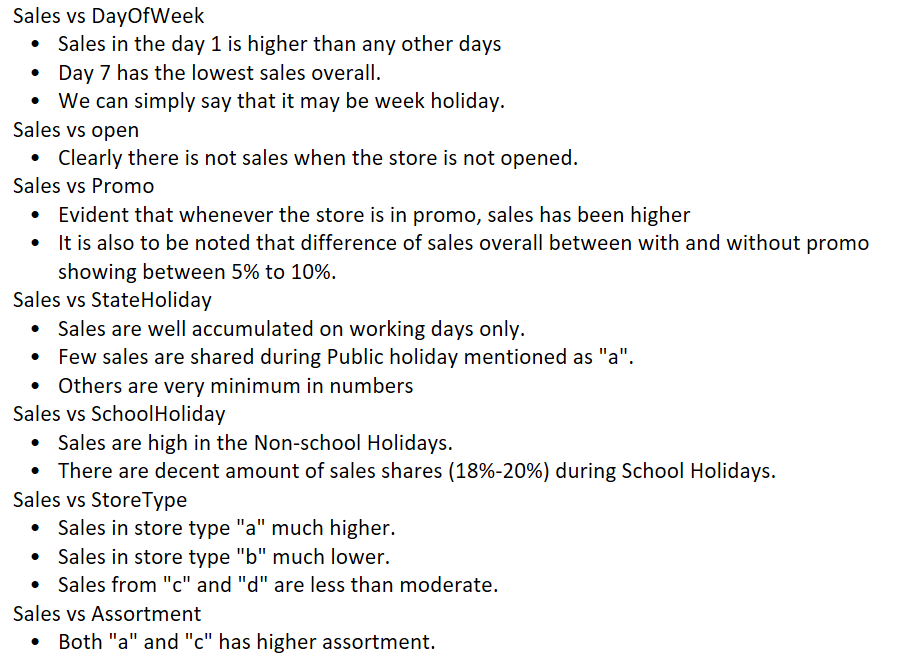Answer Here

### *Counting the number of Store available on each day of week *italicized text*

In [ ]:
# Counting the number of Store available on each day of week
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

##### Insight(s) found from the chart:

Reason for choosing countplot: used to Show the counts of observations in each categorical bin using bars

* Visualizing the operation and non-operation of the stores
* Taking the count of Days of week
* Observing that store are opened on everyday of week **except Day 7 (Sunday)**
* Comparing with other days, **Day 4 (Thursday)** has slightly higher non-opening days comparatively. 

#### *Sales of each store along with their assortment type.*

In [ ]:
#Plotting sales of each store along with their assortment type.

sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

##### Insight(s) found from the chart:

* Here we taking 3 features into single account.
* Visualizing the sales of each store type (a, b, c, d)
* As well as we segregating the each store type (a, b, c, d) further with assortment type (a,b,c)
* Simply observed that, **Storetype b** has the highest sales than others in high margin.
* **Assortment c** from storetype b has highest sales overall.

##### Gained insights from above chart:
From above chart we can see which store performing well and their assortment type which helps in positive business impact.

### Multivariate Analysis

#### *Analysing on Store type vs customers vs sales*

In [ ]:
# Grouping the storetype with sales and customers
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
print(store_type)

In [ ]:
# Share of Each Store types on overall sales 

df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

In [ ]:
# Plotting for Sales vs Storetype
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=store_type["StoreType"], y = store_type["Sales"])
plt.title("Sales vs Store type")


#Pie plotting and visulizing the percentage of sales against storetype
plt.subplot(1,2,2)
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%')
plt.show()



In [ ]:
# Bar Plot on Storetype vs Number of Customers 
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=store_type["StoreType"], y = store_type["Customers"])
plt.title("Number of Customers vs Store type ")


# Finding the Customer share percentage on each storetype.
plt.subplot(1,2,2)
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

##### Insight(s) found from the chart:

Here we used pie chart which helps in finding the propotion of each store type in overall business sales, customers.

* **"Storetype a"** which has **highest** sales and customers
* **"Storetype b"** which has **lowest** sales and customers

##### Gained insights :

From above charts we can find the performance of each store against the sales,  customers. Also, number of stores is proportional to the sales/customer contribution. 

Example: Store type 'b' are very less in numbers because of which their contribution in Sales/ Customers is also low.

#### *Yearwise sales Analysis*

In [ ]:
# Chart - 5 visualization code


# Creating separate dataframe for each year
# To analyse on sales over each month on the particular year.

sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]
sales_2013 = sales_df_2013.groupby('month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('month')['Sales'].sum().reset_index()

# Line Plot on Sales of store over the years

plt.plot(sales_2013.loc[:,"Sales"],label='2013',color='red')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.xlabel("Months")
plt.ylabel("Sales")
plt.legend()

##### Insight(s) found from the chart:

We used Line chart for findind the trend of monthwise sales in each year.

* The Green lineplot provides the sales on 2015.
* Since our data provided till mid of 2015 it stopped in mid.
* Overall the **sales at the end of year was peak**.
* Sales on **month 2, 6** reaching **local maximum**.
* Overall sales was dipping on early month particularly in **January**. 

#### *Sales analysis with reference to Competition year*

In [ ]:
# Mean sales over the years when competition opens

Mean_sale=df.groupby(['CompetitionOpenSinceYear'])['Sales'].mean()
plt.plot(Mean_sale)
plt.title('Mean Sale for Competition Open Since Year')
plt.xlabel('Competion Open Since Year')
plt.ylabel('Mean Sale')

##### Insight(s) found from the chart:

* Sales has been comparatively high when the competition open since year was old.
* It shows that, year by year when competitors increases store sales has been decreases.
* particularly between 2000 and 2020 sales has been affected in high numbers and increases to achieve peak around 2015-2018


####  Correlation Heatmap

In [ ]:

# Create a list of columns that don't need for correlation

unwanted_columns_to_corr = ["Store","Date","Year", "Open"]

# Droping "open" because it gives blank space in heatmap
# Dropping those columns that's not needed to find correlation.

correlation_df = df.drop(columns = unwanted_columns_to_corr, axis = 1)

In [ ]:
# After Noting down that the correlation map was not created for the "state holiday"
# We converting the "string" records of the "state holiday" into integer.
# Replacing the state holiday types of "a"/"b"/"c" into 1 
# and keeping the 0 as it is.

correlation_df['StateHoliday'] = correlation_df['StateHoliday'].apply(lambda x:0 if x == 0 else 1)

In [ ]:
# Plotting Heatmap for find the correlation of our variables

plt.figure(figsize=(15,10))
sns.heatmap(correlation_df.corr(), cmap="Greys", annot=True)

##### Insight(s) found from the chart:

The primary purpose of the Heatmap is to display a color-coded correlation matrix for easy visualization of the relationship between the features in the data.


$Day of the Week$
* Had Negative Relation with sales, customer, promo, school holiday.
* Had some positive relation with competition features as well as if the promo is continuing.

$Sales$
* High positive correlation with the customers.
* Decent positive correlation with the Promo given by the company.
* Other features are very low correlation with the sales

$Customers$
* As discussed above for sales.
* Both sales and customers are similar relationship with other features.

$Promo$
* Decent amount of positive relationship with sales.
* As competition distance had negative correlation with the Promo, which seams Promotion of the store is reduced or not given if the competitor are placed at more distance from the store.

$School Holiday$ and $State Holiday$
* Literally school/state holiday not have that much effect on the relationship with the other features.

$Competition Distance$
* Had some negative relationship with sales and customers.

$Promotions$
* Both Promo2 and Promo2sinceweek has similar relationship with other features as well as Highly correlated.
* But "Promo2sinceyear" had some negative relationship with the other two promotion features.
* From which we can state that, if the promo2 or/and Promo2sinceweek has high in numbers, it directly impact negatively by reduced promo2sinceyear by the company.

$Month$, $Day of year$ and $Week of year$
* All these three are highly correlated with each other.

#### Chart - 15 - Pair Plot 

In [ ]:
df.columns

In [ ]:
# Pair Plot visualization code

# Create a list of columns that don't need for correlation

pairplot_df = df[['Sales','Customers','Promo','CompetitionDistance']]
sns.pairplot(data=pairplot_df,kind='scatter')

##### Insight(s) found from the chart:

A pairs plot allows us to see both distribution of single variables and relationships between two variables .


*   We can see good linear relationship between customers and Sales only.
*   Other features are not much linearly relatable.


## ***5. Hypothesis Testing***

### Based on our chart experiments, we defining three hypothetical statements from the dataset. In the next three questions, we performing hypothesis testing to obtain final conclusion about the statements through our code and statistical testing.

### Hypothetical Statement - 1

#### 1. The difference between mean sale when promo applied and not applied



Null hypothesis: The mean sale when promo is not applied is equal to when promo is applied.

Alternate hypothesis: The mean sale is not equal when promo is not applied and when applied.
$$\begin{aligned}H_0:\mu_1&=\mu_2\\H_1:\mu_1&\ne\mu_2\end{aligned}$$

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

#importing the libraries to conduct hypothesis test
import scipy.stats as stats
import statistics

#Making two different datasets, data_1 is the sale data when Promo is not applied and data_2 is the sale data when Promo is applied
data_1=df.loc[(df['Promo'] == 0), 'Sales']
data_2=df.loc[(df['Promo']==1),'Sales']


#printing the variance of both the dataset and their ratio
print('variance of data_1 is %s'%(statistics.variance(data_1)))
print('variance of data_2 is %s'%(statistics.variance(data_2)))
print('ratio of variances is %r'%(statistics.variance(data_1)/statistics.variance(data_2)))

In [ ]:
#Performing the t-test and finding the p-value
stats.ttest_ind(a=data_1, b=data_2, equal_var=True)

* The p-value is 0 which is smaller than 0.05 significance level. So we can reject the null hypothesis and it can be concluded that mean sale is not equal when promo is applied.

##### Here We used **Two sample t-test with equal variance** Statistical test for obtaing  P-Value

##### Reason for choosing specific statistical test:

* We were comparing mean of two independent populations and we have observed that the sample variances are approximately equal. So to compare the mean of two independent population with equal variance we can use two sample t-test with equal variance.

### Hypothetical Statement - 2

#### 2. Comparing the mean sale value for assortment type

There are 3 types of assortment of a store and we will compare the mean sale of these 3 assortment stores.

Null hypothesis: The mean sale for each assortment store is equal.
$$H_0:\mu_1=\mu_2=\mu_3$$

Alternate hypothesis: At least one assortment will have different mean sale.

In [ ]:
# Perform Statistical Test to obtain P-Value

#Making three different datasets, data_1 is the sale data when Assortment "a", data_2 is the sale data when Assortment "b" 
#and data_3 is the sale data when Assortment "c"
data_1=df.loc[(df['Assortment'] == 'a'), 'Sales']
data_2=df.loc[(df['Assortment']=='b'),'Sales']
data_3=df.loc[(df['Assortment']=='c'),'Sales']


#Importing the library for F-test and conducting the test
from scipy.stats import f_oneway
f_oneway(data_1,data_2,data_3)

* From the results it can be observed that test statistic is 7309.983 and p-value is 0.0.
* The p-value is less than 0.05 significance level thus the null hypothesis can be rejected and it can be said that at least one of the assortment store has different value of mean sale.

##### Here we used **One way F-test** - Statistical test for obtaining P-Value:

Reason for choosing specific statistical test:

* When we compare the mean of more than 2 population then one way F-test is conducted and here we compared the mean of 3 populations

### Hypothetical Statement - 3

#### 3. Proportion of customers in each store type is equal or different
We have 4 types of stores a,b,c and d. We will comare the proportion of customers in each store.
* Null hypothesis: Customers are distributed uniformally in each type of store or the proportion of customers are equal in each store.
* Alternate hypothesis: The distribution of customers in store type is not uniform.

In [ ]:
# Perform Statistical Test to obtain P-Value
Observed_value_a=round(df.loc[(df['StoreType'] == 'a'), 'Customers'].sum(), 1)
Observed_value_b=round(df.loc[(df['StoreType'] == 'b'), 'Customers'].sum(), 1)
Observed_value_c=round(df.loc[(df['StoreType'] == 'c'), 'Customers'].sum(), 1)
Observed_value_d=round(df.loc[(df['StoreType'] == 'd'), 'Customers'].sum(), 1)

In [ ]:
Expected_value=df['Customers'].sum()/4
print(Expected_value)

In [ ]:
#Expected value will be same for each store type because the expected distribution is uniform.

#Importing library
import scipy.stats as stats
#Finding the test statistic and p_value
observed_data=[Observed_value_a,Observed_value_b,Observed_value_c,Observed_value_d]
expected_data=[Expected_value,Expected_value,Expected_value,Expected_value]
stats.chisquare(observed_data, expected_data)


* The p-value is 0.0 which is less than 0.05 significance level, so the null hypothesis can be rejected.
* We can conclude that the distribution of customers is not uniform and so number of customers in store types is not equal.

##### Here We used **Chi-square goodneess of fit test** as Statistical test for obtaining P-Value:

Reason for choosing specific statistical test:

* Goodness of fit test is used to test whether the variable follows the specific distribution or not. Here we were trying to test that the distribution of customers is **unifom** or not in each store type.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# Checking the outliers in the "sales" column.

sns.boxplot(x=df['Sales'])


Observation:
* There are **very large outliers** in sales 
* Reason we can observe that it was because there is **very much difference in sales on state holidays and school holidays**.
* We **cannot remove** such large outliers which may lead to loss of valid informations.
* Hence we need to **treat the outliers** accordingly using normalization or standardization.

In [ ]:
#dependent variable sale. Distribution of sale
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color="g")

Observation:
* As we see two peak raised in distribution.
* First peak is solely due to **sales recorded "0"**
* After that sales distribution has been **normally distribution**

### Treating Sales feature
* As we previously saw the distribution of sales (Two Peaks).
* We now **dropping** those rows of data which has **zero sales** in order to normal the distribution.

In [ ]:
# Dataset records before dropping the sales == 0
df.shape

In [ ]:
# Dropping the Records where there is no sales.
# It observered that there will be minimum of some sales on any day of week
# hence we dropping the zero sales records from our dataset

df.drop(df[(df['Sales'] ==0)].index, inplace=True)
# Dataset records after dropping the sales == 0
df.shape


###Transforming the sales feature
* Using SquareRoot
* Using Log Transformation 

In [ ]:
# Plotting for Squareroot Transformation
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

sns.distplot(np.sqrt(df['Sales']),color="y")
plt.title("Squareroot transformation of Sales")

# Plotting for Log Transforming
plt.subplot(1,2,2)
sns.distplot(np.log10(df['Sales']),color="y") 
plt.title("Log transformation of Sales")
plt.show()

In [ ]:
# Finding Outliers on Customers using Boxplot

# Checking for outliers from the "Customers" columns.
sns.boxplot(x=df['Customers'])

* The distribution of number of customers are very similar to sales because sales directly depends on number of customers.

In [ ]:
# Distribution of Customers after droppping the sales == 0

plt.figure(figsize=(7,7))
sns.distplot(df['Customers'],color="g")
plt.title("Distribution of Customers after dropping Zero sales")

In [ ]:
# Using Square root transformation

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(np.sqrt(df['Customers']),color="y")
plt.title("Squareroot transformation of Customers")

# Plotting for Log Transforming
plt.subplot(1,2,2)
sns.distplot(np.log10(df['Customers']),color="y")
plt.title("Log transformation of Customers")
plt.show()

### Sales during Holidays
* We Provided with two types of holiday
* Stateholiday and School Holiday

In [ ]:
df.groupby(['StateHoliday','SchoolHoliday'])['Sales'].mean().unstack()

In [ ]:
# Finding outliers on Stateholidy
# Box Plot for "Sales" during Different "State Holiday" or not.

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Sales", y="StateHoliday", data=df, orient="h")
ax.set_title('Sales for State Holiday',fontsize = 20)
ax.set_xlabel("Sales", fontsize = 15)
ax.set_ylabel("State Holiday", fontsize = 15)


In [ ]:
# Finding outliers on School holidays
# Box Plotting on Sales during School Holiday or not.

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Sales", y="SchoolHoliday", data=df, orient="h")
ax.set_title('Sales for School Holiday',fontsize = 20)
ax.set_xlabel("Sales", fontsize = 15)
ax.set_ylabel("School Holiday", fontsize = 15)

In [ ]:
# finding outliers on Assortment
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x="Sales", y="Assortment", data=df, orient="h")
ax.set_title('Sales according to Assortment',fontsize = 20)
ax.set_xlabel("Sales", fontsize = 15)
ax.set_ylabel("Assortment", fontsize = 15)


plt.subplot(1,2,2)
ax = sns.boxplot(x="Customers", y="Assortment", data=df, orient="h")
ax.set_title('Customers according to Assortment',fontsize = 20)
ax.set_xlabel("Customers", fontsize = 15)
ax.set_ylabel("Assortment", fontsize = 15)
plt.show()

In [ ]:
#Checking the Number of Records with shops not opened. 

(df[df.Open == 0]).shape

In [ ]:
# Checking Distribution of Sales
plt.figure(figsize=(10,6))
sns.distplot(x=df['Sales'],color='g')

In [ ]:
# Transforming the Sales Columns using "Log Transformation"

df['Sales'] = np.log(df['Sales'])
df.dropna(inplace=True)
sns.distplot(x=df['Sales'],color='y')

In [ ]:
df["StateHoliday"].value_counts()

In [ ]:
# We already known about the "State Holiday" and its record values
# we replacing the values as Boolean (0 or 1)

df['StateHoliday'] = df['StateHoliday'].apply(lambda x:0 if x == 0 else 1)

df["StateHoliday"].value_counts()

In [ ]:
df["CompetitionOpenSinceYear"].value_counts()

In [ ]:
df["month"].value_counts()

In [ ]:
# Combining the competition features
# We provided with competition since month and competition since year features
# we combining it as a single feature in number of months

df['CompetitionOpened'] = (df['Year'] - df['CompetitionOpenSinceYear'])*12 + (df['month'] - df['CompetitionOpenSinceMonth'])

# (2015-2010)*12 + (11-8) = 63 months

In [ ]:
df["CompetitionOpened"].describe()

In [ ]:
# To deal with the Negative values in the periodical column

df['CompetitionOpened'] = df['CompetitionOpened'].apply(lambda x:0 if x < 0 else x)

In [ ]:
#Now Dropping the features which used to combine "CompetitionOpened"
df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [ ]:
# Similar to combining the Competition features, we now try to combine the Promotional features

df['Promo2Open'] = (df['Year'] - df['Promo2SinceYear'])*12 + ((df['weekofyear'] - df['Promo2SinceWeek'])/4)

df['Promo2Open'].describe()

In [ ]:
# Dealing with Negative values
df["PromoInterval"] = df["PromoInterval"].apply(lambda x:0 if x == 'NA' else 1)

df['Promo2Open'] = df['Promo2Open'].apply(lambda x:0 if x < 0 else x) * df['Promo2']

In [ ]:
df["PromoInterval"].value_counts()

In [ ]:
#Checking the implementation

df["PromoInterval"][0:15]

In [ ]:
# Checking the Unique values and its count. 

df["PromoInterval"].value_counts()

In [ ]:
df.index

In [ ]:
df.set_index(["Date","Store"], inplace = True)


In [ ]:
df.index

In [ ]:
df.sort_index(inplace = True)

In [ ]:
df.head(1)

In [ ]:
df.drop(['Promo2SinceYear','Promo2SinceWeek'],axis=1,inplace=True)

In [ ]:
df.info()

In [ ]:
# Saving the cleaned data
df_cleaned = df.to_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_project/Regression_sale prediction/Data/df_cleaned.csv")


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns


#categorical features to be encoded.

categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']

#fitting encoder

encoder = OneHotEncoder(sparse=False)

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

One-hot encoding is also called dummy encoding due to the fact that the transformation of categorical features results into dummy features.

### 4. Data Transformation, Scaling and Splitting

In [ ]:
#Spliting the data for the logic explained above.

#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df.loc[start_train:end_train]

#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df.loc[start_test:end_test]

In [ ]:
# Creating the Separate variable called X_train, y_train from "df_train" dataset.
# Creating the Separate variable called X_test, y_test from "df_test" dataset.

X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

In [ ]:
# Training

encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names(categorical_cols))
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])

# Testing

X_test[encoded_features] = encoder.transform(X_test[categorical_cols])

# Dropping original features
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True)

In [ ]:
# Scaling your data

# We using StandardScaler for Scaling the data.
# Scaling both Training and Testing Data.

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])



StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1

### 5. Handling Imbalanced Dataset

Here in our dataset, these is no imbalance. 
In machine learning, “imbalanced classes” is a familiar problem particularly occurring in classification when we have datasets with an unequal ratio of data points in each class.

## ***7. ML Model Implementation***

### ML Model - 1 (Baseline Model - using DecisionTree algorithm)

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

# Predict on the model

def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  
  #Mean Absolute Error or MAE
  
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  
  #Mean Squared Error or MSE
  
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  
  #Root Mean Squared Error or RMSE
  
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  
  #R2
  
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [ ]:
#Creating the function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

**Metrics used for comparision:**

**MSE:** It is simply the average of the squared difference between the target value and the value predicted by the regression model. It used when we want to punish the outliers in the dataset.

**RMSE:** It used when we don’t want outliers to play a big role. In General,  the lower the RMSE, the more closely a model is able to predict the actual observations.

**MAE:** The absolute difference between the target value and the value predicted by the model. MAE is not applicable when we pay more attention to outliers.


**R2:** The metric helps us to compare our current model with a constant baseline and tells us how much our model is better.

**Adjusted R2:** R2 suffers from the problem that the scores improve on increasing terms even though the model is not improving which may misguide the researcher

In [ ]:
# Columns names in the Metrics comparision Table.

comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#Decision tree evaluation

decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)

In [ ]:
#Add result to comparision_df
add_list_to_final_df(decision_tree)

In [ ]:
# Metrics Comparision Table

comparison_df.head(1)

### ML Model - 2 (Using Radomforest algorithm)

#### 1. Explaining  the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)

#Creating the Function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  
  #Mean Absolute Error or MAE
  
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  
  #Mean Squared Error or MSE
  
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  
  #Root Mean Squared Error or RMSE
  
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  
  #R2
  
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [ ]:
#Creating the function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df1
  comparison_df1 = pd.DataFrame(final_list, columns= comparison_columns)

In [ ]:
# Columns names in the Metrics comparision Table.

comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [ ]:
# Visualizing evaluation Metric Score chart

#Random forest evaluation

random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

In [ ]:
add_list_to_final_df(random_f)

In [ ]:
# Combining the Evaluation metrics for both algorithms. 

result = comparison_df.append(comparison_df1)
result.set_index("Model_Name", inplace = True)
display(result.drop_duplicates())


### ML Model - 3 (Using Linear Regression)

In [ ]:
# # ML Model - 3 Implementation


from sklearn.linear_model import LinearRegression


reg =LinearRegression().fit(X_train, y_train)


In [ ]:
reg.score(X_train, y_train)

In [ ]:
reg.coef_  #regression coefficient of each feature

In [ ]:
reg.intercept_ #intercept of regression equation

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
#Creating the function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df2
  comparison_df2 = pd.DataFrame(final_list, columns= comparison_columns)

In [ ]:
# Columns names in the Metrics comparision Table.

comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [ ]:
Lin_reg=model_evaluation('Linear Regression',reg,X_train,y_train,X_test,y_test)

In [ ]:
add_list_to_final_df(Lin_reg)

In [ ]:
comparison_df2

In [ ]:
result = comparison_df.append(comparison_df1).append(comparison_df2)
result.set_index("Model_Name", inplace = True)
display(result.drop_duplicates())

In [ ]:
 #making predictions
y_pred_train= reg.predict(X_train)
y_pred_test= reg.predict(X_test)

# Plot the test results
a = y_test.copy()
a['Pred Sales'] = y_pred_test
df_plot = a.reset_index(level=['Date'])
plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
sns.lineplot(data = plot)
plt.ylabel("Total Sales and Predicted Sales")
plt.xticks(rotation = 25)

### 1. Evaluation metrics considered for a positive business impact: 

We used all the evaluation matrics for regression business problem and considered that **Adjusted R squared** evaluation matrics bringing positive business impact.

### 2. ML model we choose from the above created models as our final prediction model is **Random Forest Regressor** due to improved evaluation matrics compared to other models

### 3. We choose **Random Forest Regressor** as a best model and the feature importance in our model as plotted below.

In [ ]:
#visualising feature importance of XGB

feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_forest.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])
plt.rcParams.update({'figure.figsize':(7,7),'figure.dpi':100})

In [ ]:
# Creating the variables for r2 score 

decision_tree_r2 = 0.921358
random_forest_r2 = 0.962439	

# Improvement % from our Baseline model

improvement_r = ((random_forest_r2 - decision_tree_r2)/decision_tree_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

# **Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:


In [ ]:
#predictions for six weeks

y_pred_test = random_forest.predict(X_test)
six_weeks_sales_df = y_test.copy()

# Creating New column for the predicted sales.

six_weeks_sales_df['Pred_Sales'] = y_pred_test.tolist()

In [ ]:
six_weeks_sales_df.head()

In [ ]:
six_weeks_sales_df.describe()

In [ ]:
# Scaling
# importing minmax scaler

from sklearn.preprocessing import MinMaxScaler

# Fitting to the original data

cleaned_unscaled_data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone_project/Regression_sale prediction/Data/df_cleaned.csv")

#Fitting numerical columns

numerical_cols = ['Sales']
scaler = MinMaxScaler()
scaler.fit(cleaned_unscaled_data[numerical_cols])

In [ ]:
six_weeks_sales_df.head()

In [ ]:
# Inverse Transform on Six weeks sales dataset
# Inverse Transform applicable on each column of the dataset.

six_weeks_sales_df[['Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Sales']])
six_weeks_sales_df[['Pred_Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Pred_Sales']])


In [ ]:
six_weeks_sales_df.head()

In [ ]:
# Randomly Selecting a "Date" and "store" to get Actual sales vs predicted sales
six_weeks_sales_df.loc[('2015-06-17',2)]

In [ ]:
# Randomly Selecting a "Date" and "store" to get Actual sales vs predicted sales
six_weeks_sales_df.loc[('2015-07-28',10)]


### ***Thank you***